# CIS4930: Introduction to Multimodal Machine Learning in Python

## Individual Coding Assignment 01

# 1. Python Fundamentals (20 points)

In [136]:
import pandas as pd

# Making data frame from csv files
data1 = pd.read_csv("articleinfo.csv")
data2 = pd.read_csv("authorinfo.csv")

# Merge data frames into one data frame
output = pd.merge(data1, data2, on='Article No.', how='outer')

# Replace all empty cells with 0
output.fillna(0, inplace=True)

# Create new csv file for merged data frames
output.to_csv("output.csv")

### 1. Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is the number of articles published during that year.

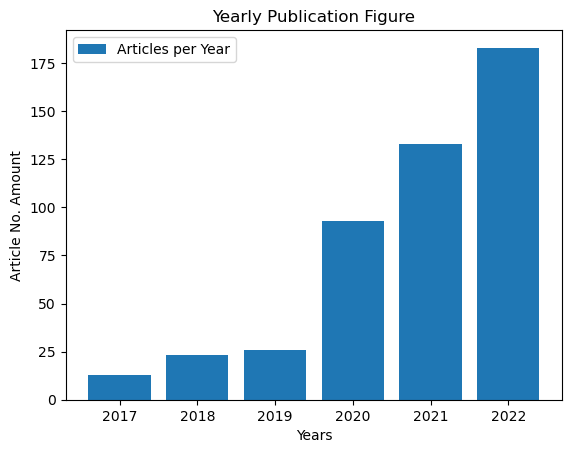

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Create dict to save values
yearly_publication = defaultdict(int)

# Iterate through all the years and increment amount of publications
for year in output["Year"]:
    yearly_publication[year] += 1

# Create empty lists
xList = []
yList = []

# Iterate dictionary and save values in list
for x in yearly_publication:
    xList.append(x)

for y in yearly_publication.values():
    yList.append(y)

# Order list properly to fix intersecting lines on graph
order = np.argsort(xList)
xArray = np.array(xList)[order]
yArray = np.array(yList)[order]

# Plot graph
plt.bar(xArray, yArray) # simply having this line of code will generate the figure
plt.title("Yearly Publication Figure") # set the title of the figure
plt.xlabel("Years") # x-axis label
plt.ylabel("Article No. Amount") # y-axis label
plt.legend(["Articles per Year"]) # set legend, this function takes a list as input
plt.show() # display the figure

### 2. Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the total number of citations during that year.

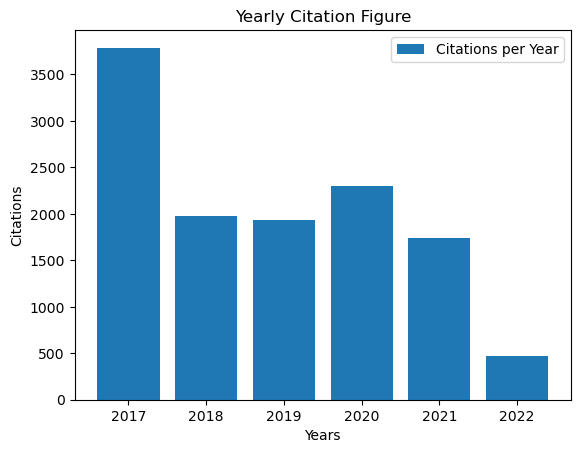

In [22]:
# Create dict to save values
yearly_citation = defaultdict(int)

# Iterate through all the years and increment amount of citations
count = 0
for year in output["Year"]:
    yearly_citation[year] += output.iloc[count, 5]
    count += 1

# Create empty lists
xList = []
yList = []

# Iterate dictionary and save values in list
for x in yearly_citation:
    xList.append(x)

for y in yearly_citation.values():
    yList.append(y)

# Order list properly to fix intersecting lines on graph
order = np.argsort(xList)
xArray = np.array(xList)[order]
yArray = np.array(yList)[order]

# Plot graph
plt.bar(xArray, yArray) # simply having this line of code will generate the figure
plt.title("Yearly Citation Figure") # set the title of the figure
plt.xlabel("Years") # x-axis label
plt.ylabel("Citations") # y-axis label
plt.legend(["Citations per Year"]) # set legend, this function takes a list as input
plt.show() # display the figure

### 3. Plot the figure of the number of publications across countries. You may use any available python libraries, such as pygal_maps_world, geopandas, or others.

In [121]:
from pygal_maps_world.maps import World

output = pd.read_csv("output.csv") # Actual file 
codes = pd.read_csv("country_codes.csv") # Code file

codeDictionary = defaultdict(int)
worldDictionary = defaultdict(int)

count = 0
for c in codes["Country"]:
    codeDictionary[c] = codes.iloc[count, 0]
    count += 1

for country in output["Country"]:
    if country in codeDictionary:
        worldDictionary[codeDictionary[country]] += 1

worldmap_chart = World()
worldmap_chart.force_uri_protocol = 'http'
worldmap_chart.title = 'Number of Publications Across Countries'
worldmap_chart.add('Publications', worldDictionary)
worldmap_chart.render_to_file('map.svg')

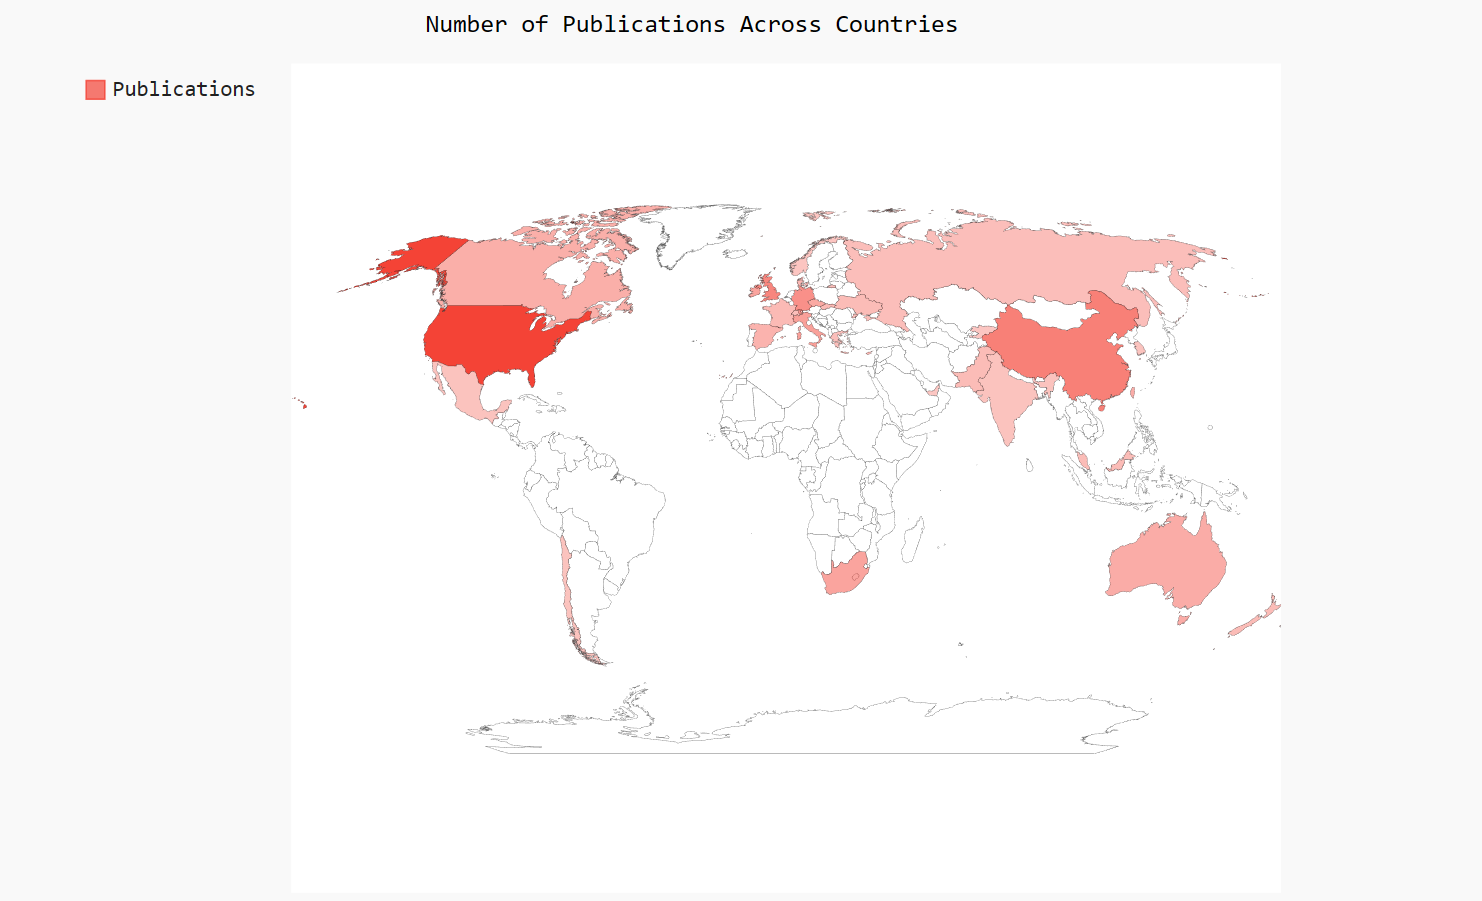

In [123]:
from IPython import display
display.Image('map.png')

### 4. What are the top 5 institutions that have the most published articles in this area?

In [24]:
# Removes all rows that have 0 in Author Affiliation
new_df = output[output['Author Affiliation'] != '0']

# Sets data frame containing amount of published articles in each institution
new_df = new_df['Author Affiliation'].value_counts()

# Sets data fram containing top 5 institutions
new_df = new_df.nlargest(5)

print("Top 5 institutions that have the most published articles in this area: \n")
print(new_df)

Top 5 institutions that have the most published articles in this area: 

University of the Western Cape         17
Masaryk University                     12
University College Cork                11
Intel Corporation                      11
The Chinese University of Hong Kong     8
Name: Author Affiliation, dtype: int64


### 5. Who are the top 5 researchers that have the most h-index in this area?

In [63]:
# Removes all rows that have 0 in Author Name
new_df = output[output['Author Name'] != '0']

# Orders data frame by descending h-index 
new_df = new_df.sort_values('h-index', ascending=[False])

# Saves only top 5 h-indexes
new_df = new_df.nlargest(5, 'h-index')

# Keeps only Author Name and h-index in data frame
new_df = new_df[['Author Name', 'h-index']]

print("Top 5 researchers that have the most h-index in this area: \n")
print(new_df)

Top 5 researchers that have the most h-index in this area: 

             Author Name  h-index
117     Ulrich Trautwein     95.0
102     Nicolas Molinari     63.0
130     George S. Athwal     59.0
147  Vicente A. González     33.0
140  Maria Luisa Lorusso     33.0


# 2. Regression (40 points)

### 1. Show the statistical results of your trained regression model.

In [56]:
df = pd.read_csv('data.csv')
df = df.fillna(0) # fill any missing values with 0
df.isna().sum() # df.isnull().sum also return the number of missing values, you can use either of them]

from sklearn.preprocessing import LabelEncoder

print(df.corr(method='pearson')['SUS'].sort_values()) # pearson: standard correlation coefficient

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Unnamed: 6           NaN
Name: SUS, dtype: float64


In [64]:
import statsmodels.api as sm

y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # predictor variables

#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        18:06:19   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

C:\Users\hadim\anaconda3\envs\assignment_one\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [81]:
x = df.drop(columns='SUS')
y = df['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [82]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.5310314773639647


In [76]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5220498503427832


### 2. What features are significant? What features are insignificant?

The features that are the most significant in this regression model are the ASR_Error and the Intent_Error. This is because the p-values for both of them are < 0.05. The features that are the least significant in this regression model are the Gender, Duration, and Purchase. This is because the p-values for both of them are > 0.05.

### 3. Were the results what you expected? Explain why or why not, for each feature.

Yes, the results were exactly what I expected. This is because it is pretty intuitive to say that Gender, Duration, and Purchase aren't really going to affect how good the system usability is of Siri for purchasing flights. In order to find out how usable the device is in purchasing flight tickets, you would need to see how many times Siri failed to understand what the user said and how many times Siri failed to process what the user had said. Whatever gender the individual is has no affect on how Siri works as a device. Also, measuring duration does not give information on whether or not the device works properly. Similarly, whether the device actually purchased the tickets does not give any good information on the usability of Siri. Overall, ASR_Error and Intent_Error are definetely two things that are most important when measuring the device usability. 

### 4. What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.

The most influential factors of SUS are Intent_error and ASR_Error. This is because the regression model gave both of these factors range scores that were pretty close to 1. This means that it had a very high correlation to the dependent variable, making it pretty influencial when it came to this model. These two factors also had p values < 0.05, meaning they were pretty significant in affecting the results of this regression model.

### 5. What are the potential reasons for these factor(s) being significant predictors of SUS?

Since the point of this experiment is to see the usability of Siri for purchasing fligh tickets, it would make sense why these two factors are significant predictors of SUS. The reason that ASR_Error was a significant predictor is because if Siri fails consistently to recognize what the user is asking it, this would entail that the device itself is very poor when it comes to ordering anything from it. This will significantly impact what users will score Siri when talking about their interaction with it. The reason that Intent_Error was a significant predictor is because, similar to the ASR_Error, if Siri is unable to understand the users' intentions after the users clearly ask it to buy flight tickets, the device won't produce accurate results and will subsequently fail its only job. This would lead to many users rating the device poorly on the SUS, and vice versa if the device works really good.

# 3. Classification (40 points)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.89      0.67      0.76        12

    accuracy                           0.83        30
   macro avg       0.85      0.81      0.82        30
weighted avg       0.84      0.83      0.83        30

              preci

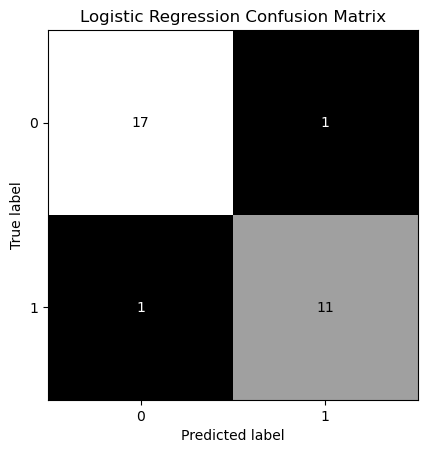

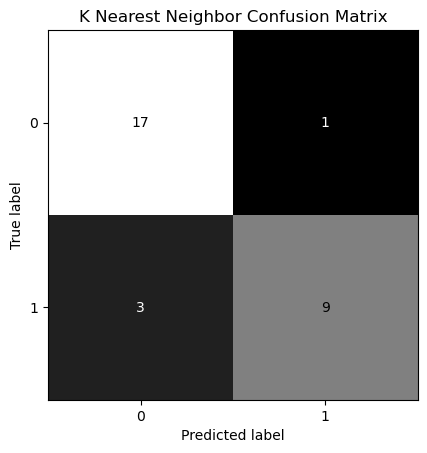

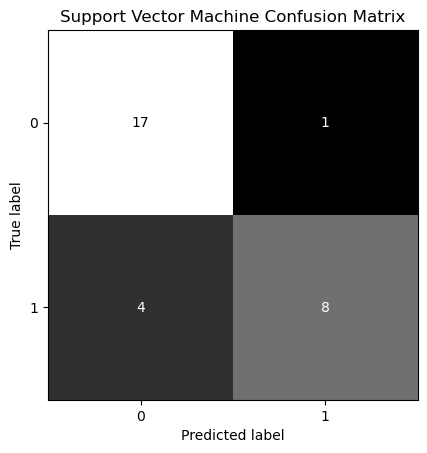

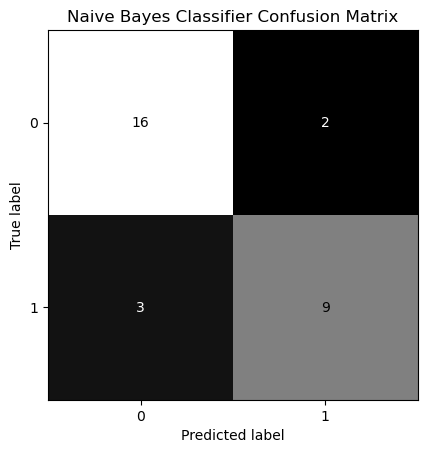

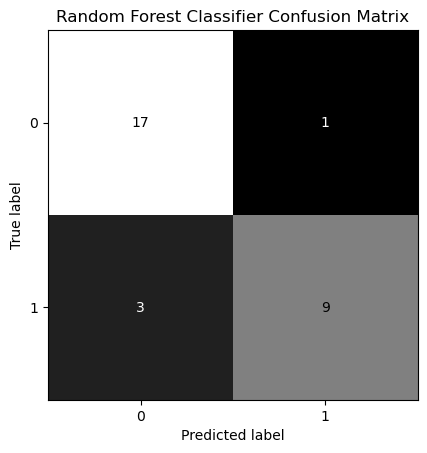

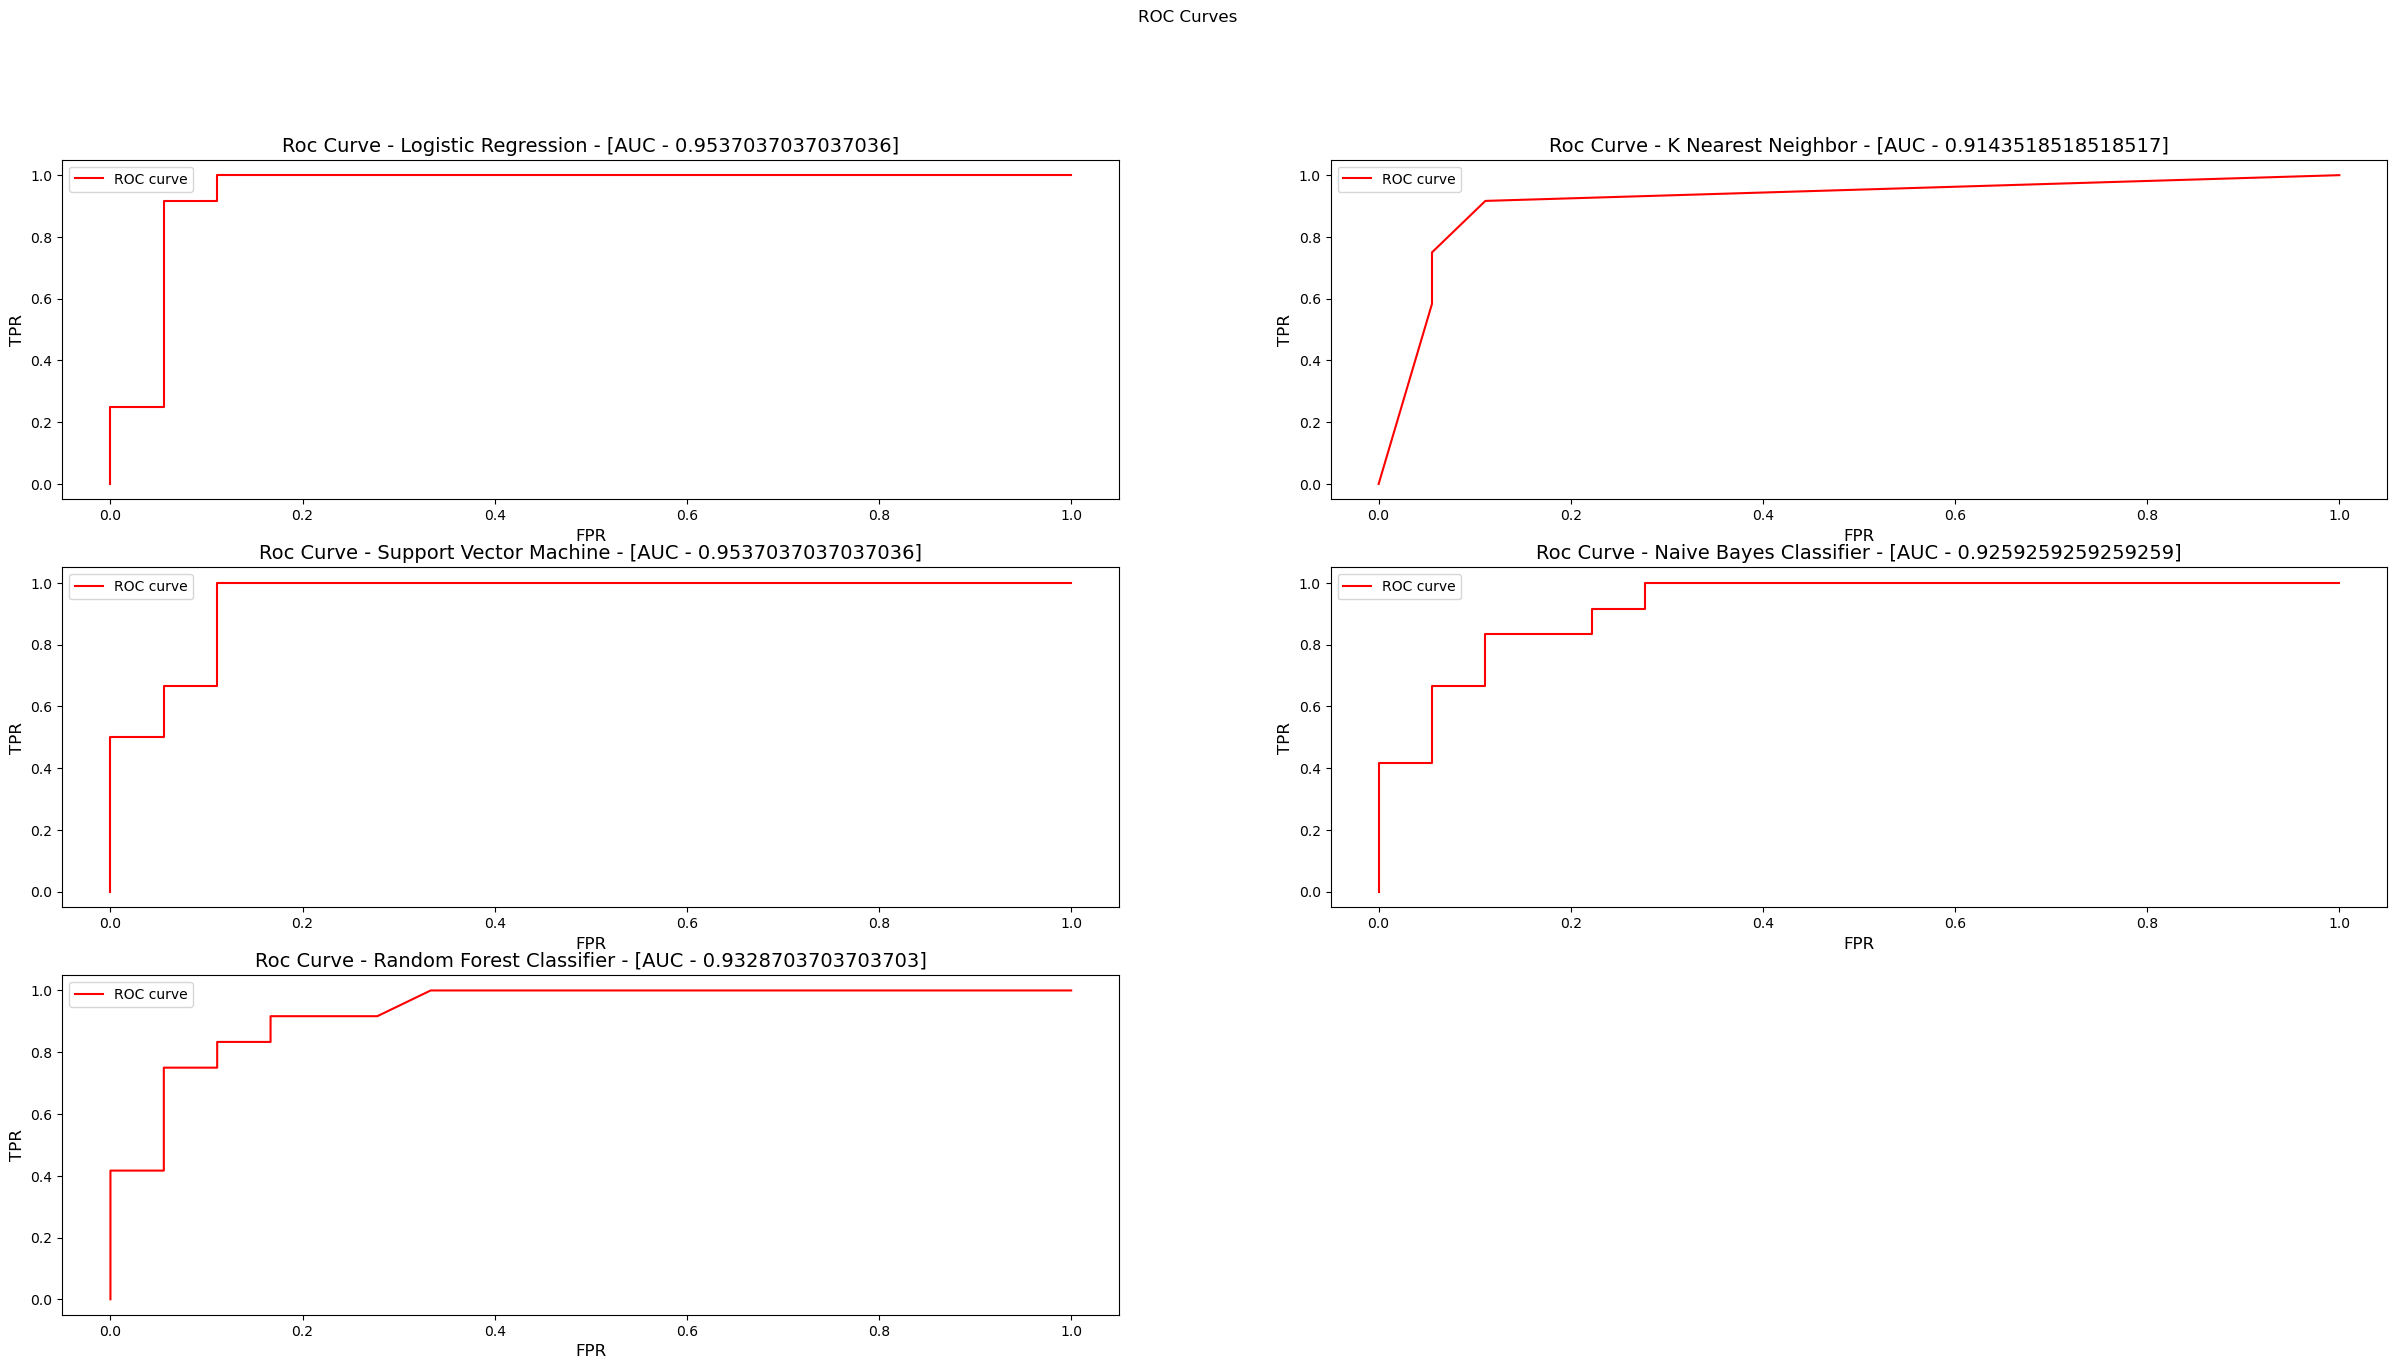

In [135]:
classification = pd.read_csv('data.csv')
classification = classification.fillna(0) # fill any missing values with 0

classification['Purchase'] = classification['Purchase'].fillna(classification['Purchase'].mean()) #cleans up data by filling in missing values with the mean value of that column
classification['SUS'] = classification['SUS'].fillna(classification['SUS'].mean())
classification['Duration'] = classification['Duration'].fillna(classification['Duration'].mean())
classification['ASR_Error'] = classification['ASR_Error'].fillna(classification['ASR_Error'].mean())
classification['Gender'] = classification['Gender'].fillna(classification['Gender'].mean())
classification['Intent_Error'] = classification['Intent_Error'].fillna(classification['Intent_Error'].mean())

# label
y = classification['Purchase'].to_numpy()


# data
X = classification.drop('Purchase', axis = 1).to_numpy()

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc.fit(over_sampled_X_train, over_sampled_y_train)
neigh.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()